In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

file_name="B0005"

#loading data
file_1="C:/Users/tarak/Documents/project/Battery_est_V2/"+file_name+"_dis_dataset.csv"
dataset=pd.read_csv(file_1)

#making dataframes
dataset["Soh"]=dataset["capacity"]/dataset["capacity"][0]
X=["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load","time"]

In [4]:
cor = dataset.corr()

<Axes: >

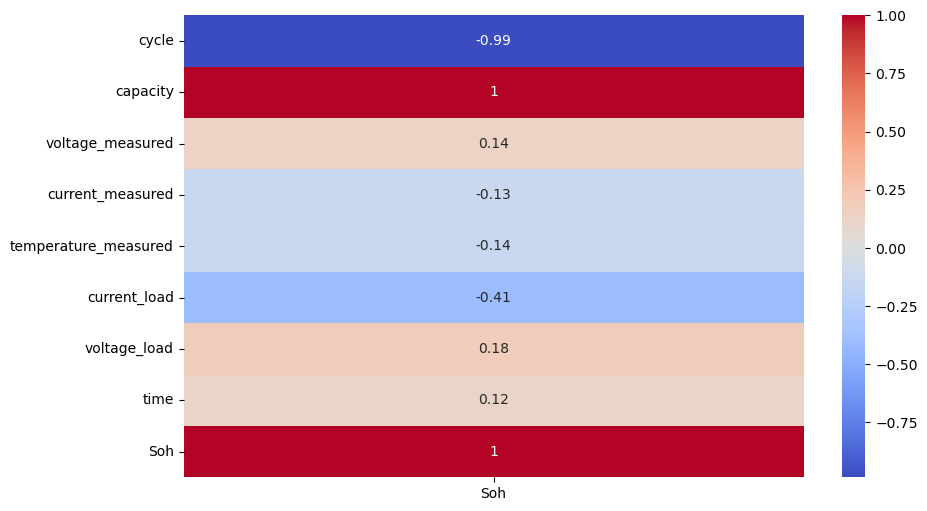

In [5]:
plt.figure(figsize=(10,6))  #select value out of range(0.05,-0.05)
sns.heatmap(cor[["Soh"]],annot=True,cmap='coolwarm')

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y,)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [32]:
mi_scores = make_mi_scores(dataset[X],dataset[["Soh"]])

C:\AA_Tarakesh\work\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
mi_scores

capacity                5.106448
cycle                   5.105217
current_load            0.530389
current_measured        0.027018
voltage_measured        0.000000
temperature_measured    0.000000
voltage_load            0.000000
time                    0.000000
Name: MI Scores, dtype: float64

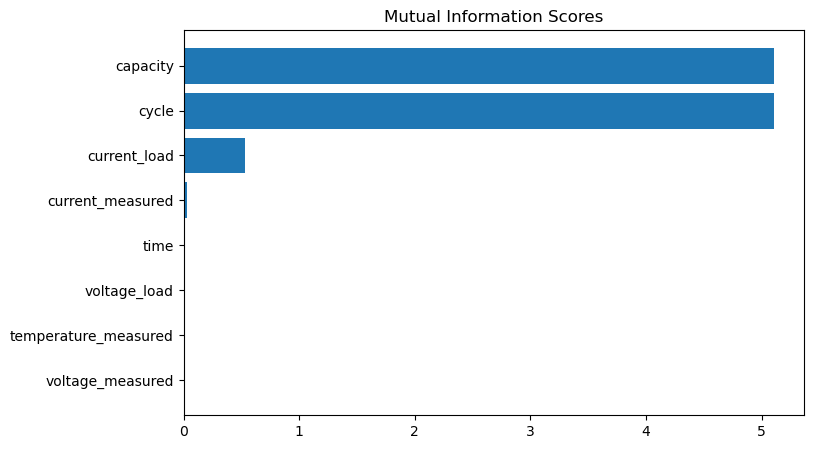

In [34]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)